In [1]:
import geopandas as gpd
import mapped

In [2]:
df = gpd.read_file(gpd.datasets.get_path('nybb'))

df['Population'] = [
    479_458, 
    2_358_582,
    2_648_771,
    1_664_727,
    1_471_160,
]

df

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,Population
0,5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...,479458
1,4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...,2358582
2,3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...,2648771
3,1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...,1664727
4,2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...,1471160


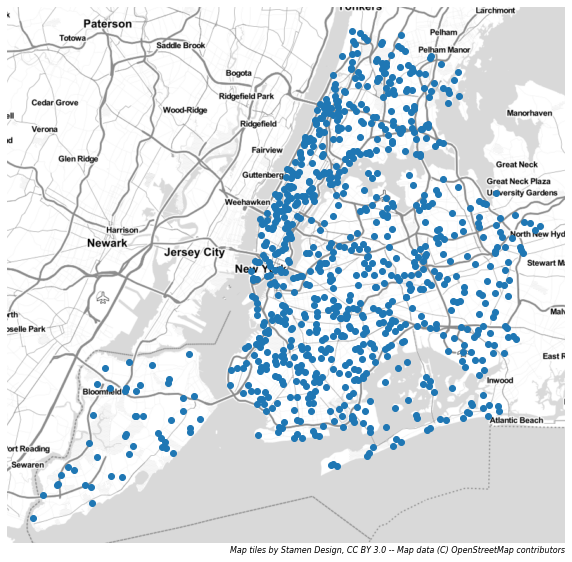

In [3]:
dots = df.dotdensity('Population', units_per_point=1e4)
dots.plot(basemap="Stamen.TonerLite");